In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

## 말뭉치 생성
- 말뭉치는 단순히 어떤 단어들의 뭉치로 만들 수 있다. 
- 비슷한 (또는 가까운) 단어들은 서로 동시에 발생할 확률이 높다는 아이디어로 출발한다.

In [2]:
text = "Thomas Jefferson once said I'm a great believer in luck, and I find the harder I work, \
the more I have of it. What, though, is luck? Webster's dictionary suggests that luck is the \
events or circumstances that operate for or against an individual. In truth, luck has nothing \
to do with something operating for or against you. Luck is not a matter of chance. \
It is a matter of being open to new experiences, perseverance, hard work, and positive thinking. \
When seventeen year old Steven Spielberg spent some time with his cousin in the summer of 1965, \
they toured Universal pictures. The tram stopped at none of the sound stages. \
Spielberg snuck off on a bathroom break to watch a bit of the real action. \
When he encountered an unfamiliar face who demanded to know what he was doing, \
he told him his story. The man turned out to be the head of the editorial department. \
Spielberg got a pass to the lot for the very next day and showed a very impressed \
Chuck Silvers four of his eight millimeter films. This was the foot in the door Spielberg \
needed to start squatting on the lot, a decision that led to his first contract with Universal Studios. \
Studies have shown that lucky people tend to be far more open to new experiences. Those who are \
unlucky are creatures of habit, never varying from one day to the next. If you want to be lucky, \
add some variety to your life. Meet new people, go to new places, and increase the possibility of \
those chance opportunities the lucky people always seem to run into."

text

"Thomas Jefferson once said I'm a great believer in luck, and I find the harder I work, the more I have of it. What, though, is luck? Webster's dictionary suggests that luck is the events or circumstances that operate for or against an individual. In truth, luck has nothing to do with something operating for or against you. Luck is not a matter of chance. It is a matter of being open to new experiences, perseverance, hard work, and positive thinking. When seventeen year old Steven Spielberg spent some time with his cousin in the summer of 1965, they toured Universal pictures. The tram stopped at none of the sound stages. Spielberg snuck off on a bathroom break to watch a bit of the real action. When he encountered an unfamiliar face who demanded to know what he was doing, he told him his story. The man turned out to be the head of the editorial department. Spielberg got a pass to the lot for the very next day and showed a very impressed Chuck Silvers four of his eight millimeter films.

## `courpus`, `word_to_id`, `id_to_word`

- `coupus` : 말뭉치, 자연어 상태의 원래 데이터를 ID 형태로 바꾼 것


- `word_to_id` : 단어를 ID로 바꿔주는 딕셔너리


- `id_to_word` : 단어의 ID를 단어로 바꿔주는 딕셔너리

In [3]:
def preprocess(text):
    # 전처리
    text = text.lower()
    text = text.replace('.', ' .').replace(',', '').replace("'", ' ').replace('?', ' ?')
    words = text.split(' ')
    
    # 딕셔너리에 담기
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    # 단어 ID로 구성된 말뭉치 행렬
    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [4]:
corpus, word_to_id, id_to_word = preprocess(text)

In [5]:
corpus

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,   4,
        12,  13,  14,   4,  15,  13,  16,   4,  17,  18,  19,  20,  21,
        22,  23,  10,  24,  25,  26,  27,  28,  29,  10,  23,  13,  30,
        31,  32,  29,  33,  34,  31,  35,  36,  37,  20,   9,  38,  10,
        39,  40,  41,  42,  43,  44,  45,  34,  31,  35,  46,  20,  10,
        23,  47,   6,  48,  18,  49,  20,  19,  23,   6,  48,  18,  50,
        51,  41,  52,  53,  54,  55,  15,  11,  56,  57,  20,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  43,  67,  68,   9,  13,  69,
        18,  70,  71,  72,  73,  74,  20,  13,  75,  76,  77,  78,  18,
        13,  79,  80,  20,  63,  81,  82,  83,   6,  84,  85,  41,  86,
         6,  87,  18,  13,  88,  89,  20,  58,  90,  91,  36,  92,  93,
        94,  95,  41,  96,  21,  90,  97,  98,  90,  99, 100,  67, 101,
        20,  13, 102, 103, 104,  41, 105,  13, 106,  18,  13, 107, 108,
        20,  63, 109,   6, 110,  41,  13, 111,  34,  13, 112, 11

- 모든 단어를 문자열이 아닌 정수형 데이터로 이루어진 ID 행렬로 바꾼 것
- 각 ID는 단어의 index로써 사용된다

In [6]:
len(corpus)

293

- 총 290단어로 이루어진 말뭉치이다.

In [7]:
len(word_to_id), len(id_to_word)

(165, 165)

- unique한 단어는 총 165개이다.

## co-occurence Matrix

- 동시-발생행렬 : 각 단어에 대해 그 주변에 다른 단어가 얼마나(빈도수) 나왔는지에 대한 정보를 담고 있는 행렬


- shape는 unique한 단어의 개수만큼의 정방행렬이다


- 각 행은 각 단어의 행이고, 각 행에는 다른 모든 단어와 동시에 발생한 횟수가 담긴다


- `window_size`는 그 단어의 양옆 몇 번째 단어까지 볼 것인지를 설정


- 즉, `window_size = 2`라면 중심 단어의 왼쪽 두 단어, 오른쪽 두 단어까지 확인하고 동시에 발생하는 횟수를 센다.



In [8]:
def create_co_matrix(corpus, window_size=1):
    corpus_size = len(corpus)
    vocab_size = len(set(corpus))
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    # 모든 단어를 조사하면서 주변 단어들에 대한 개수 세기
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [9]:
co_matrix = create_co_matrix(corpus, window_size=2)
print(co_matrix.shape)
co_matrix

(165, 165)


array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

## cosine Similarity

$cosine\_similarity(x, y) = \frac {x \cdot y}{||x||\  ||y||}$

In [10]:
def cos_similarity(x, y, eps=1e-8):
    # normalization
    nx = x / np.sqrt(np.sum(x**2) + eps)
    ny = y / np.sqrt(np.sum(y**2) + eps)
    return np.dot(nx, ny)

In [11]:
c0 = co_matrix[word_to_id['work']]
c1 = co_matrix[word_to_id['hard']]
cos_similarity(c0, c1)

0.3535533899303612

### Most Similar words
- cosine Similarity를 이용해서 구한 유사도에서 원하는 순위의 가장 유사한 단어를 출력한다.

In [12]:
def most_similar(word, word_to_id, id_to_word, co_matrix, top=5):
    if word not in word_to_id:
        print("Could not find word [%s]" % word)
        return

    print('word: ' + word + '\n')

    word_id = word_to_id[word]
    word_vec = co_matrix[word_id]

    vocab_size = len(id_to_word)
    sim_matrix = np.zeros(vocab_size)

    # 모든 vocabulary를 돌면서 similarity 계산
    for i in range(vocab_size):
        sim_matrix[i] = cos_similarity(co_matrix[i], word_vec)

    # top의 개수만큼 높은 similarity를 가지는 단어 출력
    print('Most Similar words')
    count = 0
    for i in reversed(sim_matrix.argsort()):
        if id_to_word[i] == word:
            continue
        print('[rank %d] %s : %s' % (count+1, id_to_word[i], sim_matrix[i]))
        count += 1
        if count >= top:
            return

In [13]:
most_similar('work', word_to_id, id_to_word, co_matrix)

word: work

Most Similar words
[rank 1] find : 0.7071067798607223
[rank 2] i : 0.4677071729709065
[rank 3] and : 0.3535533902618174
[rank 4] harder : 0.3535533899303612
[rank 5] hard : 0.3535533899303612


## PMI
- PMI : Pointwise Mutual Information, 점별 상호정보량  
- 두 단어가 함께 발생할 확률을 각 단어가 발생할 확률로 정규화 한 값
- 즉, `the`, `you`와 같이 원래 많이 발생하는 common한 단어들에 대해 정규화를 해서 원래 드물게 발생하는 단어들과 공정하게 경쟁할 수 있게 한다.


$PMI(x, y) = log_2 \frac {P(x, y)}{P(x)P(y)} = log_2 \frac {\frac {C(x, y)}{N}}{\frac {C(x)}{N} \frac {C(y)}{N}} = log_2 \frac {C(x, y) \cdot N}{C(x) C(y)}$


### PPMI
- PPMI는 음수인 PMI값이 나오지 않도록 0으로 lower bound 시킨 값이다.  



$PPMI(x, y) = max(0, PMI(x, y))$

In [14]:
def ppmi(co_matrix, verbose=False, eps=1e-8):
    PPMI_matrix = np.zeros_like(co_matrix, dtype=np.float32)
    
    # 모든 단어의 발생 빈도수 총합
    N = np.sum(co_matrix)
    
    # 각 단어의 독립 발생 빈도 행렬
    S = np.sum(co_matrix, axis=0)
    
    total_count = co_matrix.shape[0] * co_matrix.shape[1]
    count = 0
    
    for i in range(co_matrix.shape[0]):
        for j in range(co_matrix.shape[1]):
            pmi = np.log2(co_matrix[i, j] * N / (S[i] * S[j]) + eps)
            PPMI_matrix[i, j] = max(0, pmi)
            
            if verbose:
                count += 1
                if (count+1) % (total_count // 100) == 0:
                    print("%.1f%% Done" % (count / total * 100))
                    
    return PPMI_matrix

In [15]:
ppmi_matrix = ppmi(co_matrix)
print(ppmi_matrix)

[[0.        7.6023893 7.187352  ... 0.        0.        0.       ]
 [7.6023893 0.        6.6023893 ... 0.        0.        0.       ]
 [7.187352  6.6023893 0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        6.187352  0.       ]
 [0.        0.        0.        ... 6.187352  0.        6.6023893]
 [0.        0.        0.        ... 0.        6.6023893 0.       ]]


### PPMI 행렬의 문제점
- 단어의 말뭉치가 커짐에 따라 PPMI 행렬의 차원 수도 매우 커진다
- 또한 sparse한 행렬이기에 노이즈에 약하고 견고하지 못하며, 불필요한 연산량이 증가한다
- 이를 해결하기 위해 차원 감소 기법을 사용

## 차원 감소 - SVD
### SVD
- SVD : Singular Value Decomposition, 특잇값 분해

    
$X = USV^T$

- `U`, `V`는 직교행렬, `S`는 대각행렬


- `U` : 단어 공간, 즉 N차원에 단어가 위치하는 좌표를 N차 행렬로 나타낸 것이라고 볼 수 있다.


- `S` : 특잇값행렬, 특잇값이 큰 순서로 나열, 특잇값은 '해당 축'의 중요도라고 볼 수 있다.
- 따라서 가장 중요한 두 축은 맨 앞의 두 축일 것이고, 특잇값이 작은 원소들은 필요 시 버릴 수 있다.

In [16]:
U, S, V = np.linalg.svd(ppmi_matrix)
print("U:", U.shape)
print("S:", S.shape)
print("V:", V.shape)

U: (165, 165)
S: (165,)
V: (165, 165)


- 가장 중요한 두 축 `[0, 1]`의 두 가지 축만 사용해서 2차원 좌표평면에 표시해볼 수 있다.

In [17]:
def visualize_2D(U, word_to_id):
    plt.figure(figsize=(16, 10))
    for word, word_id in word_to_id.items():
        plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
    plt.show()

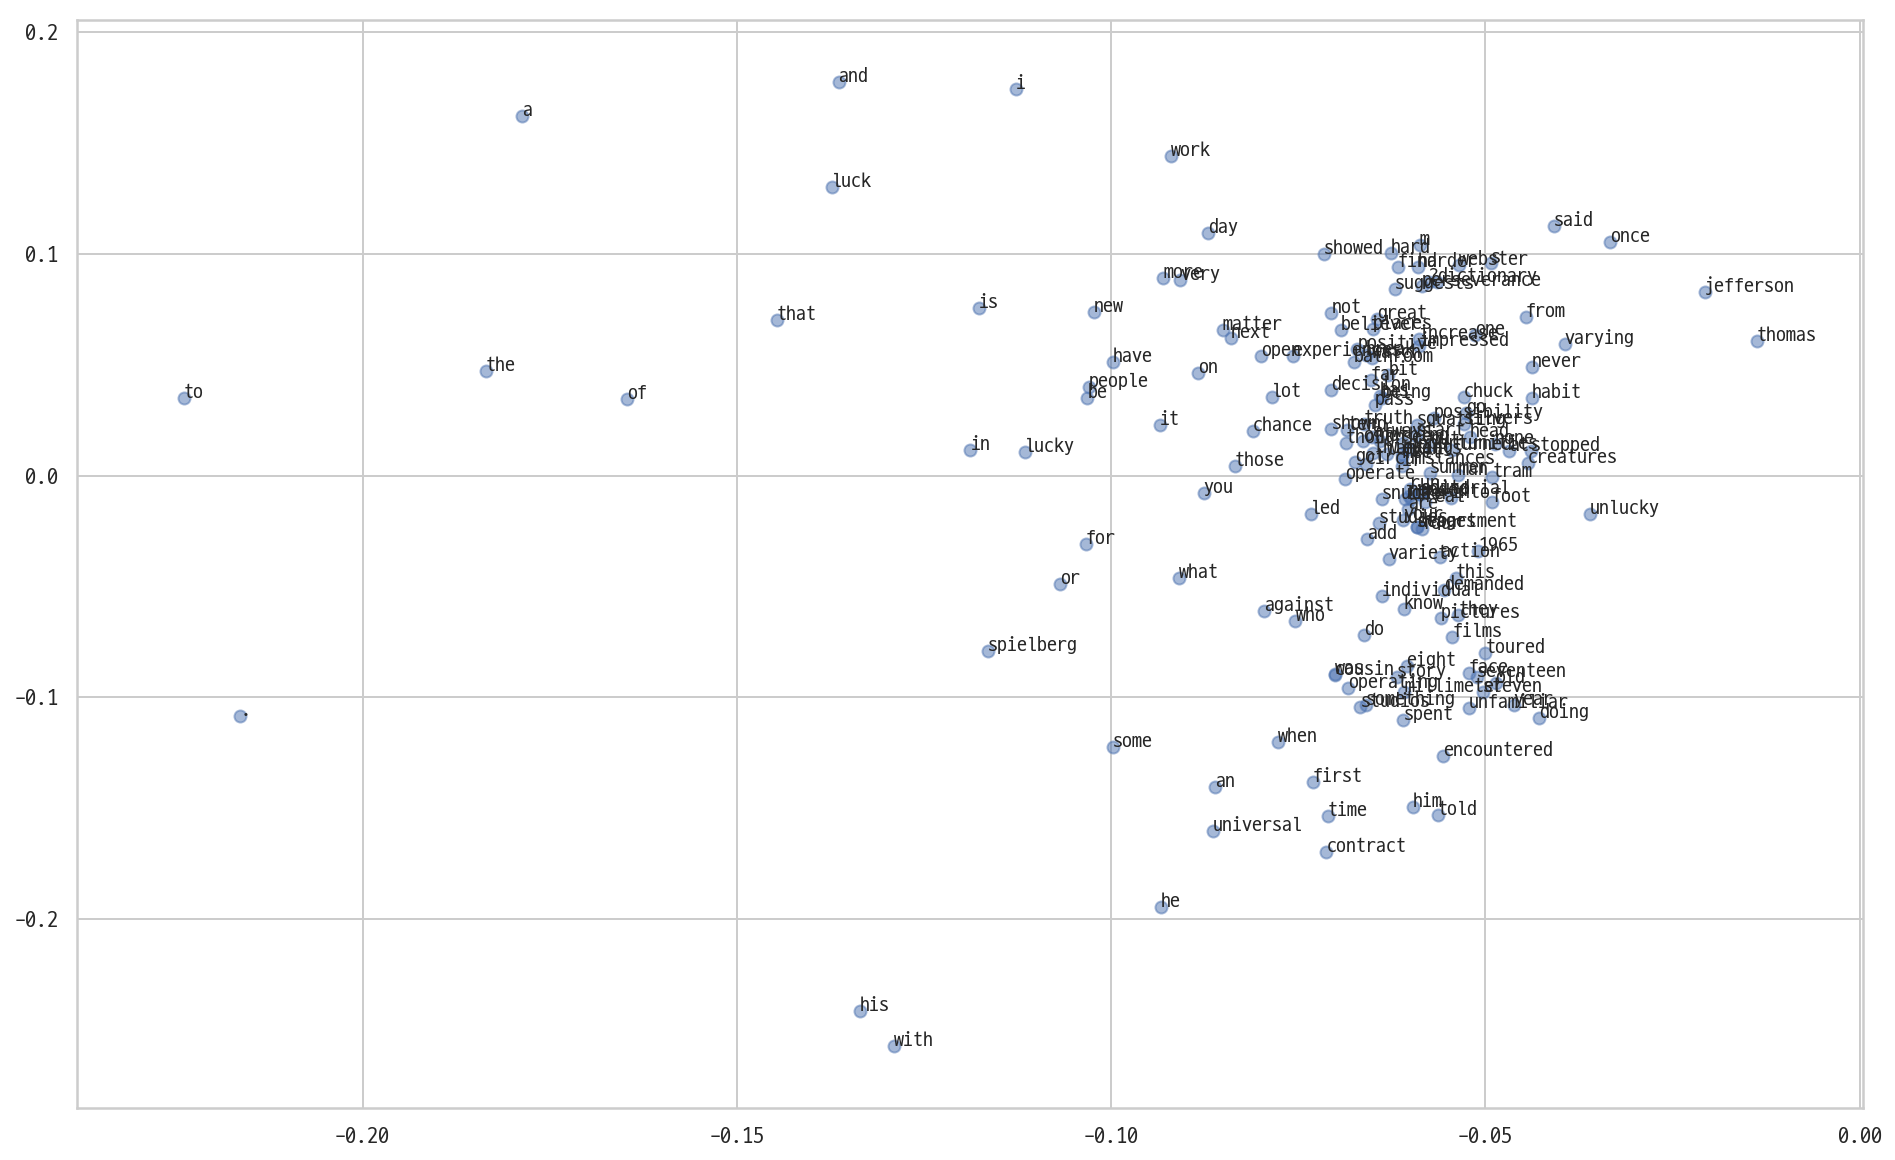

In [18]:
visualize_2D(U, word_to_id)

---

## 저장한 함수 import해서 사용하기

- 이제 지금까지의 모든 함수를 `util.py` 파일로 저장하고 import해서 사용해보도록 한다.

In [19]:
import sys
sys.path.append('..')
import numpy as np

from common.util import preprocess, create_co_matrix, cos_similarity, most_similar, ppmi, visualize_2D

## PTB 데이터셋

- PTB : Pebb Tree Bank, 펜 트리뱅크, 적당히 큰 말뭉치 데이터이다.

In [20]:
from common.dataset import PTB

In [21]:
ptb = PTB()
corpus, word_to_id, id_to_word = ptb.load_data(data_type='train')

In [22]:
print("corpus size:", corpus.shape)
print("word size:", len(word_to_id))

corpus size: (929589,)
word size: 10000


- 총 929,589개의 단어로 이루어진 말뭉치이고, 단어는 총 10000가지이다.

### PTB 데이터셋 평가

#### 동시 발생 행렬 생성

In [23]:
C = create_co_matrix(corpus, window_size=2)
C.shape

(10000, 10000)

#### PPMI 행렬 생성

In [24]:
%%time
W = ppmi(C, verbose=True)
W.shape

5.0% Done
10.0% Done
15.0% Done
20.0% Done
25.0% Done
30.0% Done
35.0% Done
40.0% Done
45.0% Done
50.0% Done
55.0% Done
60.0% Done
65.0% Done
70.0% Done
75.0% Done
80.0% Done
85.0% Done
90.0% Done
95.0% Done
100.0% Done
CPU times: user 7min 18s, sys: 328 ms, total: 7min 18s
Wall time: 7min 18s


#### SVD 차원축소

In [27]:
from sklearn.utils.extmath import randomized_svd

In [29]:
%%time

# 차원축소 시 단어 벡터 개수 (100차원에 단어공간을 생성)
wordvec_size = 100

U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5)

CPU times: user 17.8 s, sys: 1.89 s, total: 19.7 s
Wall time: 2.17 s


In [46]:
querys = ['make', 'once', 'year', 'four', 'died', 'early', 'my', 'book']
word_vecs = U

In [47]:
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)
    print('\n------------------------\n')

word: make

Most Similar words
[rank 1] made : 0.5232695937156677
[rank 2] making : 0.4735543131828308
[rank 3] evaluate : 0.4158603250980377
[rank 4] produce : 0.3927927613258362
[rank 5] get : 0.34933239221572876

------------------------

word: once

Most Similar words
[rank 1] never : 0.367669016122818
[rank 2] where : 0.35494083166122437
[rank 3] again : 0.3500673174858093
[rank 4] outside : 0.3494206368923187
[rank 5] dinkins : 0.34336286783218384

------------------------

word: year

Most Similar words
[rank 1] month : 0.7145857810974121
[rank 2] quarter : 0.6821609139442444
[rank 3] third : 0.6257489919662476
[rank 4] last : 0.6251388192176819
[rank 5] fiscal : 0.6009863018989563

------------------------

word: four

Most Similar words
[rank 1] six : 0.7722000479698181
[rank 2] three : 0.7328857183456421
[rank 3] five : 0.6696410179138184
[rank 4] two : 0.6693016886711121
[rank 5] seven : 0.6263957619667053

------------------------

word: died

Most Similar words
[rank 1] ar

꽤 납득이 갈 만한 순위들로 볼 수 있겠다..